# Notebook for creating a regional map of the CONUS

## Import plotting libraries (cartopy, matplotlib)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

## Use cartopy's shapefile reader and "add_feature" tools to set up CONUS layout- add land, ocean, lake polygons; state border, coastline line features

### NOTE: access states_provinces shapefile via ArcGIS to view attributes and include for loop to select by US region and fill with different colors

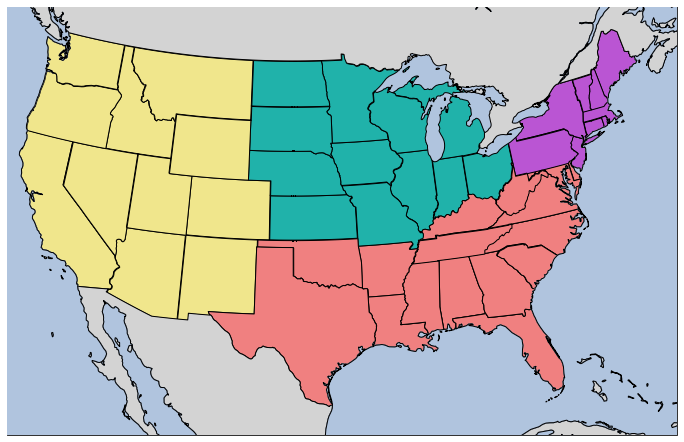

In [34]:
fig = plt.figure(figsize= (12,8)) #Plot a figure
gs1 = gridspec.GridSpec(2, 1, height_ratios=[1, .05], bottom=.05, top=.95, wspace=.1)
map_proj = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35) #Set projection, central lat/lon
ax = plt.subplot(projection = map_proj)
#ax.set_title('Maximum diameter hail for 2005', fontsize = 22)
ax.add_feature(cfeature.LAND.with_scale('10m')) #Add land
countries_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural',
                                     name='admin_0_countries')
for country, info in zip(shpreader.Reader(countries_shp).geometries(), 
                             shpreader.Reader(countries_shp).records()):
        if info.attributes['NAME_LONG'] != 'United States':

            ax.add_geometries([country], ccrs.PlateCarree(),
                             facecolor='lightgrey', edgecolor='k', zorder=6)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='k',  
                                                facecolor='None'), zorder=8) 
ax.add_feature(cfeature.BORDERS.with_scale('10m')) #Add state borders
#ax.add_feature(cfeature.STATES.with_scale('10m'), facecolor = 'none') #Add US states
                              #category='cultural', name=shapename)
states_shp = '/home/jgoodin1/shapefiles/ne_50m_admin_1_states_provinces.shp'

for state, info in zip(shpreader.Reader(states_shp).geometries(), shpreader.Reader(states_shp).records()):
        if info.attributes['admin'] == 'United States of America':

            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor='none', edgecolor='k')
            
        if info.attributes['region'] == 'Midwest':
            
            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor='lightseagreen', edgecolor='k')
            
        if info.attributes['region'] == 'Northeast':
            
            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor='mediumorchid', edgecolor='k')
            
        if info.attributes['region'] == 'South':
            
            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor='lightcoral', edgecolor='k')
        
        if info.attributes['region'] == 'West':
            
            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor='khaki', edgecolor='k')
            
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', 
                                                facecolor='lightsteelblue'), zorder=6)
lakes_shp = shpreader.natural_earth(resolution='50m',
                                     category='physical',
                                     name='lakes')
for lake, info in zip(shpreader.Reader(lakes_shp).geometries(), 
                             shpreader.Reader(lakes_shp).records()):
        name = info.attributes['name']
        if name == 'Lake Superior' or name == 'Lake Michigan' or \
           name == 'Lake Huron' or name == 'Lake Erie' or name == 'Lake Ontario':
            
            ax.add_geometries([lake], ccrs.PlateCarree(),
                             facecolor='lightsteelblue', edgecolor='k', zorder=6)
ax.set_extent([240,287,22,50])